In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math
import copy
import textwrap
global h
h=1

C:\Users\21699\AppData\Roaming\Python\Python38\site-packages\pandas\core\computation\expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


In [116]:
import xlsxwriter

In [117]:
from openpyxl.worksheet.dimensions import ColumnDimension, DimensionHolder
from openpyxl.utils import get_column_letter
from openpyxl. styles import Alignment

In [118]:
from scipy.special import logsumexp

In [119]:
import openpyxl
from openpyxl import workbook

In [5]:
filepath="C:\\Users\\21699\\Desktop\\excel\\"
x=""
y=filepath+x
print(y)

C:\Users\21699\Desktop\excel\


In [76]:
list=[1,2,3]
workbook   = xlsxwriter.Workbook(r'C:\Users\21699\Desktop\test\t.xlsx')
worksheet1 = workbook.add_worksheet()
worksheet1.write_column('B3', list)
workbook.close()

In [96]:
list=[1,2,3]
filepath="C:\\Users\\21699\\Desktop\\test\\"
wb = openpyxl.load_workbook(filepath+"t"+".xlsx")
ws = wb.worksheets[0]
your_list = ["Classe d'age","N APVP","% APVP/CA","% APVP/M par CA ","N APVP","% APVP/CA","% APVP selon maladie dans cette classe d'age ","N APVP","% APVP selon classe d'age","% APVP selon maladie dans cette classe d'age","2021"]
row_number = 2
your_column = 1
for i, value in enumerate(your_list, start=your_column):
    ws.cell(row=row_number, column=i).value = value
wb.save(filepath+"t"+".xlsx")
workbook.close()

In [95]:
filepath="C:\\Users\\21699\\Desktop\\test\\"
wb = openpyxl.load_workbook(filepath+"t"+".xlsx")
ws = wb["Sheet1"]
dim_holder = DimensionHolder(worksheet=ws)

for col in range(ws.min_column, ws.max_column + 2):
    dim_holder[get_column_letter(col)] = ColumnDimension(ws, min=col, max=col, width=15)

ws.column_dimensions = dim_holder
wb.save(filepath+'t'+".xlsx")
wb.close()

In [36]:
df20 = pd.read_csv("df20t88.csv")
df21 = pd.read_csv("df21t88.csv")
#df20 = pd.read_csv("df20t.csv")
#df21 = pd.read_csv("df21t.csv")

<ipython-input-36-2d2e14f1c0b9>:1: DtypeWarning: Columns (36) have mixed types. Specify dtype option on import or set low_memory=False.
  df20 = pd.read_csv("df20t88.csv")
<ipython-input-36-2d2e14f1c0b9>:2: DtypeWarning: Columns (56,57,59,60) have mixed types. Specify dtype option on import or set low_memory=False.
  df21 = pd.read_csv("df21t88.csv")


In [46]:
#df20=df20.set_index('DECES_ID')
df20.replace('Pas de PrÃ©cision','Pas de Précision',inplace=True)
df20.head()

,AGENT_DE_SAISIE,AgeAnalyse,GOUVERNORAU,classe_age,UCDcode,CAUSE_SOUS_JACENTE,Alcool,drogue,VAR00001,cancer,...,STATUT_CERTIFICAT,DateOfBirth,DateOfDeath,Age_Days,Age_years,Sous_Chapitre,chapitre,PrimaryLast,CC,CC1
DECES_ID,,,,,,,,,,,,,,,,,,,,,
1790402.0,jihed,Pas de Précision,Bizerte,NaN,Autres gastroentÃ©rites et colites d?origine i...,Autres gastroentÃ©rites et colites d?origine i...,NaN,NaN,5.0,2.0,...,complet,NaN,NaN,NaN,NaN,Maladies intestinales infectieuses,Certaines maladies infectieuses et parasitaires,Observation principale,A09,Diarrhée et gastro_entérite d'origine présumée...
4280059.0,marwa,Pas de Précision,Kasserine,NaN,GastroentÃ©rites et colites d?origine non prÃ©...,GastroentÃ©rites et colites d?origine non prÃ©...,NaN,NaN,5.0,2.0,...,complet,NaN,NaN,NaN,NaN,Maladies intestinales infectieuses,Certaines maladies infectieuses et parasitaires,Observation principale,A099,Diarrhée et gastro_entérite d'origine présumée...
1393020.0,jihed,Pas de Précision,Ben Arous,NaN,"Tuberculose pulmonaire, (sans mention de confi...","Tuberculose pulmonaire, (sans mention de confi...",NaN,NaN,5.0,2.0,...,complet,NaN,NaN,NaN,NaN,Tuberculose,Certaines maladies infectieuses et parasitaires,Observation principale,A162,Tuberculose de l'appareil respiratoire
1617028.0,Ilhem,Pas de Précision,Zaghouan,NaN,"Tuberculose pulmonaire, (sans mention de confi...","Tuberculose pulmonaire, (sans mention de confi...",NaN,NaN,5.0,2.0,...,complet,NaN,NaN,NaN,NaN,NaN,NaN,Observation principale,A162,Tuberculose de l'appareil respiratoire
2140431.0,manel,Pas de Précision,BÃ©ja,NaN,"Tuberculose pulmonaire, (sans mention de confi...","Tuberculose pulmonaire, (sans mention de confi...",NaN,NaN,5.0,2.0,...,complet,NaN,NaN,NaN,NaN,Tuberculose,NaN,Observation principale,A162,Tuberculose de l'appareil respiratoire


In [47]:
df20.SEXE

DECES_ID
1790402.0     Pas de Précision
4280059.0     Pas de Précision
1393020.0     Pas de Précision
1617028.0     Pas de Précision
2140431.0     Pas de Précision
                    ...       
1181632.0              Feminin
1595025.0              Feminin
3380207.0             Masculin
3115335.0             Masculin
51400089.0            Masculin
Name: SEXE, Length: 46419, dtype: object

In [11]:
df21=df21.set_index('DECES_ID')
df21.head()

,AGENT_DE_SAISIE,TYPE_DE_CERTIFICAT,GOUVERNORAU,classe_age,SEXE,CAUSE_SOUS_JACENTE,CAUSE_A,CAUSE_B,CAUSE_C,CAUSE_D,...,STATUT_CERTIFICAT,DateOfBirth,DateOfDeath,Age_years,Age_Days,filter_$,CC,Newage,Nr,CC1
DECES_ID,,,,,,,,,,,,,,,,,,,,,
4110086.0,Amal,Certificat complete,Kairouan,75-79,Masculin,A00,R092,U071,9999,NaN,...,complet,1942-03-13,2021-01-31,78.0,28814.0,Not Selected,Certains maladies infectueuses et parasitaires,Undefined,ME,Choléra
3210111.0,Amal,Certificat complete,Monastir,<1 an,Feminin,A047,A047,R579,A419,J80,...,complet,2021-08-17,2021-10-07,0.0,51.0,Not Selected,Certains maladies infectueuses et parasitaires,Undefined,ME,Autres maladies intestinales infectieuses
1739324.0,Manel,Certificat complete,Bizerte,manquant,Pas de Précision,A047,A419,A047,9999,NaN,...,complet,NaN,NaN,NaN,NaN,Not Selected,Certains maladies infectueuses et parasitaires,Undefined,NE,Autres maladies intestinales infectieuses
4340381.0,Ilhem,Certificat complete,Sidi Bouzid,<1 an,Masculin,A049,J960,R579,A419,A049,...,complet,2021-01-20,2021-12-15,0.0,329.0,Not Selected,Certains maladies infectueuses et parasitaires,Undefined,MW,Autres maladies intestinales infectieuses
3118068.0,Amal,Certificat complete,Sousse,45-49,Feminin,A049,A419,A049,9999,NaN,...,complet,1974-04-05,2021-12-21,47.0,17427.0,Not Selected,Certains maladies infectueuses et parasitaires,Undefined,ME,Autres maladies intestinales infectieuses


In [100]:
df20["index"]=df20.index
lf20 = pd.pivot_table(df20, values='index', index=['CC1'],columns=['SEXE','classe_age'],fill_value=0, aggfunc='count')
#df21["index"]=df21.index
#lf21 = pd.pivot_table(df21, values='index', index=['CC1'],columns=['SEXE','classe_age'],fill_value=0, aggfunc='count')
var1=lf20.loc["COVID-19",'Pas de Précision']
var=lf20.loc["COVID-19",'Masculin']
print(var1)
print(var)

classe_age
1-4          0
15-19        0
20-24        0
25-29        0
30-34        0
35-39        0
40-44        0
45-49        0
5-9          0
50-54        0
55-59        1
60-64        4
65-69        3
70-74        6
75-79        2
80-84        4
85-89        1
90-94        1
95 & plus    0
<1 an        1
Name: COVID-19, dtype: int64
classe_age
1-4            0
10-14          1
15-19          3
20-24          7
25-29          4
30-34          5
35-39         17
40-44         12
45-49         27
5-9            0
50-54         71
55-59        103
60-64        172
65-69        228
70-74        195
75-79        219
80-84        163
85-89        112
90-94         47
95 & plus     20
<1 an          7
Name: COVID-19, dtype: int64


In [52]:
def Txi(i,g):
    s=0
    df=pd.read_csv("data (1).csv")
    df.columns=df.iloc[0]
    df=df.drop(index=0)
    df.pop(df.columns[0])
    df=df.set_index("Age Group")
    if i=="1-4":
            k=1
    elif i=="<1 an":
            k=0
    elif i=="5-9":
            k=2
    elif i=='10-14':
            k=3
    elif i=='15-19':
            k=4
    elif i=='20-24':
            k=5
    elif i=='25-29':
            k=6
    elif i=='30-34':
            k=7
    elif i=='35-39':
            k=8
    elif i=='40-44':
            k=9
    elif i=="45-49":
            k=10
    elif i=='50-54':
            k=11
    elif i=='55-59':
            k=12
    elif i=='60-64':
            k=13
    elif i=='65-69':
            k=14
    elif i=='70-74':
            k=15
    elif i=='75-79':
            k=16
    if g=="Pas de Précision":
        s=(float(df["Male"][k])+float(df["Female"][k]))/2            
    else:
        s=float(df[g][k])
    return s

In [53]:
Txi("1-4","Pas de Précision")

77.20664684

In [102]:
def Nxi(i):
    #L2021=[449372,1070239,944532,805973,769307,845867,862847,900584,858461,780961,680158,665392,544471,461708,286317,181675]
    L2020=[475986,1050195,913359,798934,785276,867210,878797,895585,844029,757824,676189,653691,535792,438259,266359,180439]
    if i=="1-4":
            k=0
    elif i=="<1 an":
            k=h-1
            #return float(13398)
            return float(13662)
    elif i=="5-9":
            k=1
    elif i=='10-14':
            k=2
    elif i=='15-19':
            k=3
    elif i=='20-24':
            k=4
    elif i=='25-29':
            k=5
    elif i=='30-34':
            k=6
    elif i=='35-39':
            k=7
    elif i=='40-44':
            k=8
    elif i=="45-49":
            k=9
    elif i=='50-54':
            k=10
    elif i=='55-59':
            k=11
    elif i=='60-64':
            k=12
    elif i=='65-69':
            k=13
    elif i=='70-74':
            k=14
    elif i=='75-79':
            k=15
    
    return(float(L2020[k]))

In [99]:
S=0
L=["Diarrhée et gastro_entérite d'origine présumée infectieuse","Tuberculose de l'appareil respiratoire","Autre formes de tuberculose","Tuberculose","Autres maladies intestinales infectieuses","Tétanos","Coqueluche","Infection à méningocoques","Septicémie","Poliomyélite aigué","Rougeole","Autres maladies à virus","Paludisme","Reste du chapitre de certaines maladieinfectieuses et parasitaires","Leucémies","Restant des tumeurs malignes","Reste du chapitre des tumeurs","Anémies","Reste du chapitre des maladies du sang et des organes hématopoétiques et certains troubles dy système immunitaire","Reste du chapitre des maladies endocriniennes, nutritionnelles et métaboliques","Méningites","Reste du chapitre des maladies du système nerveux","Maladies de l'oreille et de l'apophysemastoide","Maladies de l'appareil circulatoire","Pneumopathies","Autres affections aigues des voies respiratoires","Reste du chapitre des maladies de l'appareil respiratoire",
"Maladies de l'appareil digestif",
"Foetus et nouveau-né affectés par des troubles maternels et par des complications de la grossesse du travail et de laccouvchement",
"Anomalies liées à la durée de la gestation et à la croissance du foetus","Traumatismes obstétricaux","PHypoxie intra uterine et asphyxie obstericale",
"Détresse respiratoire du nouveau né","Pneumpathie cogénitale",
"Autres troubles respiratoires du nouveau-né","Infection bactérienne du nouveau-né",
"Affections hémorragiques et hématologiques du foetus et du nouveau_né","Reste du chapitre des affections dont l'origine se situe dans la période périnatale",
"Hydrocéphalie congénitale et spina bifida","Autres malformations congénitales du système nerveux",
"Malfromations congénitales du coeur","Syndrome de Down et autres anomalies chromosomiques",
"Autres malformations congénitales de l'appareil circulatoire","Autres malformations congénitales",
"Symptomes, signes et résultats anormaux d'examens cliniques et de laboratoire, non classés ailleurs",
"Cause externes de morbidité et de mortalité","Accident de transport","Noyade et submersion accidentelles",
"Autre accodents affectant la respiration","Exposition a la fumée, au feu et aux flammes","Intoxication accidentelle",
"Agressions","Toutes autres causes externes","SRAS","COVID-19","Hépatite virale",
"Leishmaniose","Tumeurs maligne de l'oesophage",
   "Tumeurs maligne de l'estomac","Tumeurs maligne du colon, du rectum et de l'anus",
   "Tumeurs maligne de foie et des voies biliaires intra héctiques","Tumeurs maligne du pancréas",
   "Tumeurs maligne du larynx","Tumeurs maligne de la trachée, des bronches et du poumon","Mélanome  malin de la peau",
   "Tumeurs maligne du sein","Tumeurs maligne du l'utérus","Tumeurs maligne de partie du l'utérus, autres et non precisées",
   "Tumeurs maligne de l'ovaire","Tumeurs maligne de la prostate","Tumeurs maligne de al vessie",
   "Tumeur maligne des méninges, du cerveau et d'autre parties du système nerveux central","Lymphome non hodkinien",
   "Myélome multiple et tumeurs malignes à plasmocytes","Leucémies","Restant des tumeurs malignes","Malnutrition",
   "Diabète sucré","Reste du chapitre des maladies endocriniennes, nutritionnelles et métaboliques",
   "Trouble mentaux liés a l'utilisation de substances psychoactives",
   "Reste du chapitre des troubles mentaux et du comportement","Alzheimer",
   "Maladies de l'oreille et de ses annexes","Rhumatisme","Maladies hypertensives","Cardiopathies ischémiques",
   "Autres cardiopathies","Maladies cérébrovasculaires",
   "Reste du chapitre des maladies de l'appareil circulatoire","Grippe",
   "Autres affections aigués des voies respiratoires inférieurs",
   "Maladies chroniques des voies respiratoires inférieures","Ulcère de l'estomac et du duodénum",
   "Maladies du foie","Maladies de la peau et du tissu cellulaire sous-cutané",
   "Maladies du systéme ostéo-articulaire, des muscles et du tissu conjonctif",
   "Glomérulopathies et maladies rénales tubulo-interstitielles",
   "Reste du chapitre des maladies de l'appareil génito-urinaire","Grossesse se terminant par un avortement",
   "Autres décès maternels directs","Décès maternels indirects",
   "Certaines affections dont l'origine se situe dans la période périnatale",
   "Malformations congénitales et anomalies chromosomiques","Chute"]

for c in L:
    S=S+lf20.loc[c,'Masculin']["75-79"]+lf20.loc[c,'Feminin']["75-79"]+lf20.loc[c,'Pas de Précision']["75-79"]
print(S)

4601


In [101]:
def Pxi(i,g,c):
    if g=="Male":
        j="Masculin"
    elif g=="Female":
        j="Feminin"
    else:
        j="Pas de Précision"
    #L2021=[2495,150,179,282,188,267,23,514,766,1115,1605,2403,3685,5091,6590,7015,7018]
    L2020=[2084,259,150,120,167,209,317,384,503,740,997,1486,2284,3153,3955,4079,4601]
    #Pas de PrÃ©cision
    l=0
    
    if i=='10-14':
            if j=="Pas de Précision":
                S=float('nan')
            else:
                k=1
                l=3
                S=lf20.loc[c,j][k]
    else:
        if i=="<1 an":
            k=20
            l=0
            if j=="Pas de Précision":
                k=k-1
        elif i=="5-9":
            k=9
            l=2
            if j=="Pas de Précision":
                k=k-1
        elif i=="1-4":
            k=0
            l=1
            if j=="Pas de Précision":
                k=k
        elif i=='15-19':
            k=2
            l=4
            if j=="Pas de Précision":
                k=k-1
        elif i=='20-24':
            k=3
            l=5
            if j=="Pas de Précision":
                k=k-1
        elif i=='25-29':
            k=4
            l=6
            if j=="Pas de Précision":
                k=k-1
        elif i=='30-34':
            k=5
            l=7
            if j=="Pas de Précision":
                k=k-1
        elif i=='35-39':
            k=6
            l=8
            if j=="Pas de Précision":
                k=k-1
        elif i=='40-44':
            k=7
            l=9
            if j=="Pas de Précision":
                k=k-1
        elif i=="45-49":
            k=8
            l=10
            if j=="Pas de Précision":
                k=k-1
        elif i=='50-54':
            k=10
            l=11
            if j=="Pas de Précision":
                k=k-1
        elif i=='55-59':
            k=11
            l=12
            if j=="Pas de Précision":
                k=k-1
        elif i=='60-64':
            k=12
            l=13
            if j=="Pas de Précision":
                k=k-1
        elif i=='65-69':
            k=13
            l=14
            if j=="Pas de Précision":
                k=k-1
        elif i=='70-74':
            k=14
            l=15
            if j=="Pas de Précision":
                k=k-1
        elif i=='75-79':
            k=15
            l=16
            if j=="Pas de Précision":
                k=k-1
        S=lf20.loc[c,j][k]
    return S/L2020[l]

In [104]:
print(Pxi("10-14","Female","COVID-19"))
print(Pxi("10-14","Pas de précision","COVID-19"))

0.008333333333333333
nan


In [105]:
def nbd(i,g):
    return Nxi(i)*Txi(i,g)

In [109]:
print(nbd("10-14","Male"))
print(nbd("10-14","Female"))
print(nbd("10-14","Pas de Précision"))

60670760.629517004
64457660.02602531
62564210.32777116


In [107]:
def nbdc(i,g,c):
    return nbd(i,g)*Pxi(i,g,c)

In [112]:
print(nbdc("10-14","Male","COVID-19"))
print(nbdc("10-14","Female","COVID-19"))
print(nbdc("10-14","Pas de Précision","COVID-19"))

505589.6719126417
537147.1668835443
nan


In [113]:
def chooseA(a):
    if a=="<1 an":
        r=0.5
    else:
        L=a.split("-")
        r=(int(L[0])+int(L[1]))/2
    return r

In [137]:
def APV(i,g,c):
    return (79-chooseA(i))*nbdc(i,g,c)

In [123]:
#L=["Causes externes de morbidité et de mortalité",
  #"Certaines affections dont l'origine se situe dans la période périnatale",
  ##"Certains maladies infectueuses et parasitaires",
  #"COVID-19",
  #"Grossesse, accouchement et puerpéralité",
  #"Maladies de la peau et du tissu cellulaire sous-cutané",
  #"Maladies de l'appareil digestif",
  #"Maladies de l'appareil génito-urinaire",
  #"Maladies de l'appareil respiratoire",
  #"Maladies de l'oreille et de l'apohyse mastoide",
  #"Maladies du systeme nerveux",
  #"Maladies du système ostéo-urinaire",
  #"Maladies endocriniennes, nutritionnelles et certains troubles du système immunitaires",
  #"Maladies endocriniennes, nutritionnelles et metaboliques",
  #"Malformations congénitales et anomalies chromosomiques",
  #"Symptomes, signes et resultats anormaux d'examens cliniques et de laboratoire, non classé ailleurs",
  #"Troubles mentaux et du comportement",
  #"Tumeurs"]
L=["Diarrhée et gastro_entérite d'origine présumée infectieuse","Tuberculose de l'appareil respiratoire","Autre formes de tuberculose","Tuberculose","Autres maladies intestinales infectieuses","Tétanos","Coqueluche","Infection à méningocoques","Septicémie","Poliomyélite aigué","Rougeole","Autres maladies à virus","Paludisme","Reste du chapitre de certaines maladieinfectieuses et parasitaires","Leucémies","Restant des tumeurs malignes","Reste du chapitre des tumeurs","Anémies","Reste du chapitre des maladies du sang et des organes hématopoétiques et certains troubles dy système immunitaire","Reste du chapitre des maladies endocriniennes, nutritionnelles et métaboliques","Méningites","Reste du chapitre des maladies du système nerveux","Maladies de l'oreille et de l'apophysemastoide","Maladies de l'appareil circulatoire","Pneumopathies","Autres affections aigues des voies respiratoires","Reste du chapitre des maladies de l'appareil respiratoire",
"Maladies de l'appareil digestif",
"Foetus et nouveau-né affectés par des troubles maternels et par des complications de la grossesse du travail et de laccouvchement",
"Anomalies liées à la durée de la gestation et à la croissance du foetus","Traumatismes obstétricaux","PHypoxie intra uterine et asphyxie obstericale",
"Détresse respiratoire du nouveau né","Pneumpathie cogénitale",
"Autres troubles respiratoires du nouveau-né","Infection bactérienne du nouveau-né",
"Affections hémorragiques et hématologiques du foetus et du nouveau_né","Reste du chapitre des affections dont l'origine se situe dans la période périnatale",
"Hydrocéphalie congénitale et spina bifida","Autres malformations congénitales du système nerveux",
"Malfromations congénitales du coeur","Syndrome de Down et autres anomalies chromosomiques",
"Autres malformations congénitales de l'appareil circulatoire","Autres malformations congénitales",
"Symptomes, signes et résultats anormaux d'examens cliniques et de laboratoire, non classés ailleurs",
"Cause externes de morbidité et de mortalité","Accident de transport","Noyade et submersion accidentelles",
"Autre accodents affectant la respiration","Exposition a la fumée, au feu et aux flammes","Intoxication accidentelle",
"Agressions","Toutes autres causes externes","SRAS","COVID-19","Hépatite virale",
"Leishmaniose","Tumeurs maligne de l'oesophage",
   "Tumeurs maligne de l'estomac","Tumeurs maligne du colon, du rectum et de l'anus",
   "Tumeurs maligne de foie et des voies biliaires intra héctiques","Tumeurs maligne du pancréas",
   "Tumeurs maligne du larynx","Tumeurs maligne de la trachée, des bronches et du poumon","Mélanome  malin de la peau",
   "Tumeurs maligne du sein","Tumeurs maligne du l'utérus","Tumeurs maligne de partie du l'utérus, autres et non precisées",
   "Tumeurs maligne de l'ovaire","Tumeurs maligne de la prostate","Tumeurs maligne de al vessie",
   "Tumeur maligne des méninges, du cerveau et d'autre parties du système nerveux central","Lymphome non hodkinien",
   "Myélome multiple et tumeurs malignes à plasmocytes","Leucémies","Restant des tumeurs malignes","Malnutrition",
   "Diabète sucré","Reste du chapitre des maladies endocriniennes, nutritionnelles et métaboliques",
   "Trouble mentaux liés a l'utilisation de substances psychoactives",
   "Reste du chapitre des troubles mentaux et du comportement","Alzheimer",
   "Maladies de l'oreille et de ses annexes","Rhumatisme","Maladies hypertensives","Cardiopathies ischémiques",
   "Autres cardiopathies","Maladies cérébrovasculaires",
   "Reste du chapitre des maladies de l'appareil circulatoire","Grippe",
   "Autres affections aigués des voies respiratoires inférieurs",
   "Maladies chroniques des voies respiratoires inférieures","Ulcère de l'estomac et du duodénum",
   "Maladies du foie","Maladies de la peau et du tissu cellulaire sous-cutané",
   "Maladies du systéme ostéo-articulaire, des muscles et du tissu conjonctif",
   "Glomérulopathies et maladies rénales tubulo-interstitielles",
   "Reste du chapitre des maladies de l'appareil génito-urinaire","Grossesse se terminant par un avortement",
   "Autres décès maternels directs","Décès maternels indirects",
   "Certaines affections dont l'origine se situe dans la période périnatale",
   "Malformations congénitales et anomalies chromosomiques","Chute"]
A=[]
filepath="C:\\Users\\21699\\Desktop\\2020\\"
e=0
e2=0
e3=0
e4=0
e5=0
e6=0
e7=0
e8=0
e9=0
e10=0
e11=0
e7g=0
e01=0
e012=0
e013=0
e014=0
e015=0
e016=0
e017=0
e018=0
e019=0
i01=0
i02=0
i03=0
u0=0
u01=0
u02=0
u03=0
u04=0
u=0
u1=0
u2=0
u3=0
u4=0
utest=0
#x="Tumeurs"
y="Pas de Précision"
for i in L:
    u=u+APV("<1 an",y,i)
    u1=u1+APV("1-4",y,i)
    u2=u2+APV("5-9",y,i)
    u3=u3+APV("10-14",y,i)
    u4=u4+APV("15-19",y,i)
    e=e+APV("20-24",y,i)
    e2=e2+APV("25-29",y,i)
    e3=e3+APV("30-34",y,i)
    e4=e4+APV("35-39",y,i)
    e5=e5+APV("40-44",y,i)
    e6=e6+APV("45-49",y,i)
    e7=e7+APV("50-54",y,i)
    e7g=e7g+APV("55-59",y,i)
    e8=e8+APV("60-64",y,i)
    e9=e9+APV("65-69",y,i)
    e10=e10+APV("70-74",y,i)
    e11=e11+APV("75-79",y,i)
for x in L:
    A=[]
    u0=round(APV("<1 an",y,x)/u*100,2)
    A.append(u0)
    u01=round(APV("1-4",y,x)/u1*100,2)
    A.append(u01)
    u02=round(APV("5-9",y,x)/u2*100,2)
    A.append(u02)
    u03=round(APV("10-14",y,x)/u3*100,2)
    A.append(u03)
    u04=round(APV("15-19",y,x)/u4*100,2)
    A.append(u04)
    e01=round(APV("20-24",y,x)/e*100,2)
    A.append(e01)
    e012=round(APV("25-29",y,x)/e2*100,2)
    A.append(e012)
    e013=round(APV("30-34",y,x)/e3*100,2)
    A.append(e013)
    e014=round(APV("35-39",y,x)/e4*100,2)
    A.append(e01)
    e015=round(APV("40-44",y,x)/e5*100,2)
    A.append(e015)
    e016=round(APV("45-49",y,x)/e6*100,2)
    A.append(e016)
    e017=round(APV("50-54",y,x)/e7*100,2)
    A.append(e017)
    e018=round(APV("55-59",y,x)/e7g*100,2)
    A.append(e018)
    e019=round(APV("60-64",y,x)/e8*100,2)
    A.append(e019)
    i01=round(APV("65-69",y,x)/e9*100,2)
    A.append(i01)
    i02=round(APV("70-74",y,x)/e10*100,2)
    A.append(i02)
    i03=round(APV("75-79",y,x)/e11*100,2)
    A.append(i03)
    
    wb = openpyxl.load_workbook(filepath+x+".xlsx")
    ws = wb.worksheets[0]
    row_number = 3
    your_column = 10
    for i, value in enumerate(A, start=row_number):
        ws.cell(row=i, column=your_column).value = value
    wb.save(filepath+x+".xlsx")
    wb.close()
    """
    workbook   = xlsxwriter.Workbook(filepath+x+".xlsx")
    worksheet1 = workbook.add_worksheet()
    worksheet1.write_column('D3', A)
    workbook.close()
    """

In [125]:
L=["Diarrhée et gastro_entérite d'origine présumée infectieuse","Tuberculose de l'appareil respiratoire","Autre formes de tuberculose","Tuberculose","Autres maladies intestinales infectieuses","Tétanos","Coqueluche","Infection à méningocoques","Septicémie","Poliomyélite aigué","Rougeole","Autres maladies à virus","Paludisme","Reste du chapitre de certaines maladieinfectieuses et parasitaires","Leucémies","Restant des tumeurs malignes","Reste du chapitre des tumeurs","Anémies","Reste du chapitre des maladies du sang et des organes hématopoétiques et certains troubles dy système immunitaire","Reste du chapitre des maladies endocriniennes, nutritionnelles et métaboliques","Méningites","Reste du chapitre des maladies du système nerveux","Maladies de l'oreille et de l'apophysemastoide","Maladies de l'appareil circulatoire","Pneumopathies","Autres affections aigues des voies respiratoires","Reste du chapitre des maladies de l'appareil respiratoire",
"Maladies de l'appareil digestif",
"Foetus et nouveau-né affectés par des troubles maternels et par des complications de la grossesse du travail et de laccouvchement",
"Anomalies liées à la durée de la gestation et à la croissance du foetus","Traumatismes obstétricaux","PHypoxie intra uterine et asphyxie obstericale",
"Détresse respiratoire du nouveau né","Pneumpathie cogénitale",
"Autres troubles respiratoires du nouveau-né","Infection bactérienne du nouveau-né",
"Affections hémorragiques et hématologiques du foetus et du nouveau_né","Reste du chapitre des affections dont l'origine se situe dans la période périnatale",
"Hydrocéphalie congénitale et spina bifida","Autres malformations congénitales du système nerveux",
"Malfromations congénitales du coeur","Syndrome de Down et autres anomalies chromosomiques",
"Autres malformations congénitales de l'appareil circulatoire","Autres malformations congénitales",
"Symptomes, signes et résultats anormaux d'examens cliniques et de laboratoire, non classés ailleurs",
"Cause externes de morbidité et de mortalité","Accident de transport","Noyade et submersion accidentelles",
"Autre accodents affectant la respiration","Exposition a la fumée, au feu et aux flammes","Intoxication accidentelle",
"Agressions","Toutes autres causes externes","SRAS","COVID-19","Hépatite virale",
"Leishmaniose","Tumeurs maligne de l'oesophage",
   "Tumeurs maligne de l'estomac","Tumeurs maligne du colon, du rectum et de l'anus",
   "Tumeurs maligne de foie et des voies biliaires intra héctiques","Tumeurs maligne du pancréas",
   "Tumeurs maligne du larynx","Tumeurs maligne de la trachée, des bronches et du poumon","Mélanome  malin de la peau",
   "Tumeurs maligne du sein","Tumeurs maligne du l'utérus","Tumeurs maligne de partie du l'utérus, autres et non precisées",
   "Tumeurs maligne de l'ovaire","Tumeurs maligne de la prostate","Tumeurs maligne de al vessie",
   "Tumeur maligne des méninges, du cerveau et d'autre parties du système nerveux central","Lymphome non hodkinien",
   "Myélome multiple et tumeurs malignes à plasmocytes","Leucémies","Restant des tumeurs malignes","Malnutrition",
   "Diabète sucré","Reste du chapitre des maladies endocriniennes, nutritionnelles et métaboliques",
   "Trouble mentaux liés a l'utilisation de substances psychoactives",
   "Reste du chapitre des troubles mentaux et du comportement","Alzheimer",
   "Maladies de l'oreille et de ses annexes","Rhumatisme","Maladies hypertensives","Cardiopathies ischémiques",
   "Autres cardiopathies","Maladies cérébrovasculaires",
   "Reste du chapitre des maladies de l'appareil circulatoire","Grippe",
   "Autres affections aigués des voies respiratoires inférieurs",
   "Maladies chroniques des voies respiratoires inférieures","Ulcère de l'estomac et du duodénum",
   "Maladies du foie","Maladies de la peau et du tissu cellulaire sous-cutané",
   "Maladies du systéme ostéo-articulaire, des muscles et du tissu conjonctif",
   "Glomérulopathies et maladies rénales tubulo-interstitielles",
   "Reste du chapitre des maladies de l'appareil génito-urinaire","Grossesse se terminant par un avortement",
   "Autres décès maternels directs","Décès maternels indirects",
   "Certaines affections dont l'origine se situe dans la période périnatale",
   "Malformations congénitales et anomalies chromosomiques","Chute"]
filepath="C:\\Users\\21699\\Desktop\\2020\\"
for x in L:
    wb = openpyxl.load_workbook(filepath+x+".xlsx")
    ws = wb.worksheets[0]
    your_list = ["< 1 an","1-4","5-9","10-14","15-19","20-24","25-29","30-34","35-39","40-44","45-49","50-54","55-59","60-64","65-69","70-74","75-79"]
    row_number = 3
    your_column = 1
    for i, value in enumerate(your_list, start=row_number):
        ws.cell(row=i, column=your_column).value = value
    wb.save(filepath+x+".xlsx")
    workbook.close()
    

In [142]:
L=["Diarrhée et gastro_entérite d'origine présumée infectieuse","Tuberculose de l'appareil respiratoire","Autre formes de tuberculose","Tuberculose","Autres maladies intestinales infectieuses","Tétanos","Coqueluche","Infection à méningocoques","Septicémie","Poliomyélite aigué","Rougeole","Autres maladies à virus","Paludisme","Reste du chapitre de certaines maladieinfectieuses et parasitaires","Leucémies","Restant des tumeurs malignes","Reste du chapitre des tumeurs","Anémies","Reste du chapitre des maladies du sang et des organes hématopoétiques et certains troubles dy système immunitaire","Reste du chapitre des maladies endocriniennes, nutritionnelles et métaboliques","Méningites","Reste du chapitre des maladies du système nerveux","Maladies de l'oreille et de l'apophysemastoide","Maladies de l'appareil circulatoire","Pneumopathies","Autres affections aigues des voies respiratoires","Reste du chapitre des maladies de l'appareil respiratoire",
"Maladies de l'appareil digestif",
"Foetus et nouveau-né affectés par des troubles maternels et par des complications de la grossesse du travail et de laccouvchement",
"Anomalies liées à la durée de la gestation et à la croissance du foetus","Traumatismes obstétricaux","PHypoxie intra uterine et asphyxie obstericale",
"Détresse respiratoire du nouveau né","Pneumpathie cogénitale",
"Autres troubles respiratoires du nouveau-né","Infection bactérienne du nouveau-né",
"Affections hémorragiques et hématologiques du foetus et du nouveau_né","Reste du chapitre des affections dont l'origine se situe dans la période périnatale",
"Hydrocéphalie congénitale et spina bifida","Autres malformations congénitales du système nerveux",
"Malfromations congénitales du coeur","Syndrome de Down et autres anomalies chromosomiques",
"Autres malformations congénitales de l'appareil circulatoire","Autres malformations congénitales",
"Symptomes, signes et résultats anormaux d'examens cliniques et de laboratoire, non classés ailleurs",
"Cause externes de morbidité et de mortalité","Accident de transport","Noyade et submersion accidentelles",
"Autre accodents affectant la respiration","Exposition a la fumée, au feu et aux flammes","Intoxication accidentelle",
"Agressions","Toutes autres causes externes","SRAS","COVID-19","Hépatite virale",
"Leishmaniose","Tumeurs maligne de l'oesophage",
   "Tumeurs maligne de l'estomac","Tumeurs maligne du colon, du rectum et de l'anus",
   "Tumeurs maligne de foie et des voies biliaires intra héctiques","Tumeurs maligne du pancréas",
   "Tumeurs maligne du larynx","Tumeurs maligne de la trachée, des bronches et du poumon","Mélanome  malin de la peau",
   "Tumeurs maligne du sein","Tumeurs maligne du l'utérus","Tumeurs maligne de partie du l'utérus, autres et non precisées",
   "Tumeurs maligne de l'ovaire","Tumeurs maligne de la prostate","Tumeurs maligne de al vessie",
   "Tumeur maligne des méninges, du cerveau et d'autre parties du système nerveux central","Lymphome non hodkinien",
   "Myélome multiple et tumeurs malignes à plasmocytes","Leucémies","Restant des tumeurs malignes","Malnutrition",
   "Diabète sucré","Reste du chapitre des maladies endocriniennes, nutritionnelles et métaboliques",
   "Trouble mentaux liés a l'utilisation de substances psychoactives",
   "Reste du chapitre des troubles mentaux et du comportement","Alzheimer",
   "Maladies de l'oreille et de ses annexes","Rhumatisme","Maladies hypertensives","Cardiopathies ischémiques",
   "Autres cardiopathies","Maladies cérébrovasculaires",
   "Reste du chapitre des maladies de l'appareil circulatoire","Grippe",
   "Autres affections aigués des voies respiratoires inférieurs",
   "Maladies chroniques des voies respiratoires inférieures","Ulcère de l'estomac et du duodénum",
   "Maladies du foie","Maladies de la peau et du tissu cellulaire sous-cutané",
   "Maladies du systéme ostéo-articulaire, des muscles et du tissu conjonctif",
   "Glomérulopathies et maladies rénales tubulo-interstitielles",
   "Reste du chapitre des maladies de l'appareil génito-urinaire","Grossesse se terminant par un avortement",
   "Autres décès maternels directs","Décès maternels indirects",
   "Certaines affections dont l'origine se situe dans la période périnatale",
   "Malformations congénitales et anomalies chromosomiques","Chute"]
filepath="C:\\Users\\21699\\Desktop\\2020\\"
for x in L:
    wb = openpyxl.load_workbook(filepath+x+".xlsx")
    ws = wb.worksheets[0]
    your_list = ["Classe d'age","N APVP","% APVP/CA","% APVP/M par CA ","N APVP","% APVP/CA","% APVP/M par CA ","N APVP","% APVP/CA","% APVP/M par CA ","2020"]
    row_number = 2
    your_column = 1
    for i, value in enumerate(your_list, start=your_column):
        ws.cell(row=row_number, column=i).value = value
    wb.save(filepath+x+".xlsx")
    workbook.close()

In [127]:
L=["Diarrhée et gastro_entérite d'origine présumée infectieuse","Tuberculose de l'appareil respiratoire","Autre formes de tuberculose","Tuberculose","Autres maladies intestinales infectieuses","Tétanos","Coqueluche","Infection à méningocoques","Septicémie","Poliomyélite aigué","Rougeole","Autres maladies à virus","Paludisme","Reste du chapitre de certaines maladieinfectieuses et parasitaires","Leucémies","Restant des tumeurs malignes","Reste du chapitre des tumeurs","Anémies","Reste du chapitre des maladies du sang et des organes hématopoétiques et certains troubles dy système immunitaire","Reste du chapitre des maladies endocriniennes, nutritionnelles et métaboliques","Méningites","Reste du chapitre des maladies du système nerveux","Maladies de l'oreille et de l'apophysemastoide","Maladies de l'appareil circulatoire","Pneumopathies","Autres affections aigues des voies respiratoires","Reste du chapitre des maladies de l'appareil respiratoire",
"Maladies de l'appareil digestif",
"Foetus et nouveau-né affectés par des troubles maternels et par des complications de la grossesse du travail et de laccouvchement",
"Anomalies liées à la durée de la gestation et à la croissance du foetus","Traumatismes obstétricaux","PHypoxie intra uterine et asphyxie obstericale",
"Détresse respiratoire du nouveau né","Pneumpathie cogénitale",
"Autres troubles respiratoires du nouveau-né","Infection bactérienne du nouveau-né",
"Affections hémorragiques et hématologiques du foetus et du nouveau_né","Reste du chapitre des affections dont l'origine se situe dans la période périnatale",
"Hydrocéphalie congénitale et spina bifida","Autres malformations congénitales du système nerveux",
"Malfromations congénitales du coeur","Syndrome de Down et autres anomalies chromosomiques",
"Autres malformations congénitales de l'appareil circulatoire","Autres malformations congénitales",
"Symptomes, signes et résultats anormaux d'examens cliniques et de laboratoire, non classés ailleurs",
"Cause externes de morbidité et de mortalité","Accident de transport","Noyade et submersion accidentelles",
"Autre accodents affectant la respiration","Exposition a la fumée, au feu et aux flammes","Intoxication accidentelle",
"Agressions","Toutes autres causes externes","SRAS","COVID-19","Hépatite virale",
"Leishmaniose","Tumeurs maligne de l'oesophage",
   "Tumeurs maligne de l'estomac","Tumeurs maligne du colon, du rectum et de l'anus",
   "Tumeurs maligne de foie et des voies biliaires intra héctiques","Tumeurs maligne du pancréas",
   "Tumeurs maligne du larynx","Tumeurs maligne de la trachée, des bronches et du poumon","Mélanome  malin de la peau",
   "Tumeurs maligne du sein","Tumeurs maligne du l'utérus","Tumeurs maligne de partie du l'utérus, autres et non precisées",
   "Tumeurs maligne de l'ovaire","Tumeurs maligne de la prostate","Tumeurs maligne de al vessie",
   "Tumeur maligne des méninges, du cerveau et d'autre parties du système nerveux central","Lymphome non hodkinien",
   "Myélome multiple et tumeurs malignes à plasmocytes","Leucémies","Restant des tumeurs malignes","Malnutrition",
   "Diabète sucré","Reste du chapitre des maladies endocriniennes, nutritionnelles et métaboliques",
   "Trouble mentaux liés a l'utilisation de substances psychoactives",
   "Reste du chapitre des troubles mentaux et du comportement","Alzheimer",
   "Maladies de l'oreille et de ses annexes","Rhumatisme","Maladies hypertensives","Cardiopathies ischémiques",
   "Autres cardiopathies","Maladies cérébrovasculaires",
   "Reste du chapitre des maladies de l'appareil circulatoire","Grippe",
   "Autres affections aigués des voies respiratoires inférieurs",
   "Maladies chroniques des voies respiratoires inférieures","Ulcère de l'estomac et du duodénum",
   "Maladies du foie","Maladies de la peau et du tissu cellulaire sous-cutané",
   "Maladies du systéme ostéo-articulaire, des muscles et du tissu conjonctif",
   "Glomérulopathies et maladies rénales tubulo-interstitielles",
   "Reste du chapitre des maladies de l'appareil génito-urinaire","Grossesse se terminant par un avortement",
   "Autres décès maternels directs","Décès maternels indirects",
   "Certaines affections dont l'origine se situe dans la période périnatale",
   "Malformations congénitales et anomalies chromosomiques","Chute"]
filepath="C:\\Users\\21699\\Desktop\\2020\\"
for x in L:
    wb = openpyxl.load_workbook(filepath+x+".xlsx")
    ws = wb.worksheets[0]
    your_list = ["Masculin","","","Feminin","","","Pas de Précision","",""]
    row_number = 1
    your_column = 2
    for i, value in enumerate(your_list, start=your_column):
        ws.cell(row=row_number, column=i).value = value
    wb.save(filepath+x+".xlsx")
    workbook.close()

In [128]:
L=["Diarrhée et gastro_entérite d'origine présumée infectieuse","Tuberculose de l'appareil respiratoire","Autre formes de tuberculose","Tuberculose","Autres maladies intestinales infectieuses","Tétanos","Coqueluche","Infection à méningocoques","Septicémie","Poliomyélite aigué","Rougeole","Autres maladies à virus","Paludisme","Reste du chapitre de certaines maladieinfectieuses et parasitaires","Leucémies","Restant des tumeurs malignes","Reste du chapitre des tumeurs","Anémies","Reste du chapitre des maladies du sang et des organes hématopoétiques et certains troubles dy système immunitaire","Reste du chapitre des maladies endocriniennes, nutritionnelles et métaboliques","Méningites","Reste du chapitre des maladies du système nerveux","Maladies de l'oreille et de l'apophysemastoide","Maladies de l'appareil circulatoire","Pneumopathies","Autres affections aigues des voies respiratoires","Reste du chapitre des maladies de l'appareil respiratoire",
"Maladies de l'appareil digestif",
"Foetus et nouveau-né affectés par des troubles maternels et par des complications de la grossesse du travail et de laccouvchement",
"Anomalies liées à la durée de la gestation et à la croissance du foetus","Traumatismes obstétricaux","PHypoxie intra uterine et asphyxie obstericale",
"Détresse respiratoire du nouveau né","Pneumpathie cogénitale",
"Autres troubles respiratoires du nouveau-né","Infection bactérienne du nouveau-né",
"Affections hémorragiques et hématologiques du foetus et du nouveau_né","Reste du chapitre des affections dont l'origine se situe dans la période périnatale",
"Hydrocéphalie congénitale et spina bifida","Autres malformations congénitales du système nerveux",
"Malfromations congénitales du coeur","Syndrome de Down et autres anomalies chromosomiques",
"Autres malformations congénitales de l'appareil circulatoire","Autres malformations congénitales",
"Symptomes, signes et résultats anormaux d'examens cliniques et de laboratoire, non classés ailleurs",
"Cause externes de morbidité et de mortalité","Accident de transport","Noyade et submersion accidentelles",
"Autre accodents affectant la respiration","Exposition a la fumée, au feu et aux flammes","Intoxication accidentelle",
"Agressions","Toutes autres causes externes","SRAS","COVID-19","Hépatite virale",
"Leishmaniose","Tumeurs maligne de l'oesophage",
   "Tumeurs maligne de l'estomac","Tumeurs maligne du colon, du rectum et de l'anus",
   "Tumeurs maligne de foie et des voies biliaires intra héctiques","Tumeurs maligne du pancréas",
   "Tumeurs maligne du larynx","Tumeurs maligne de la trachée, des bronches et du poumon","Mélanome  malin de la peau",
   "Tumeurs maligne du sein","Tumeurs maligne du l'utérus","Tumeurs maligne de partie du l'utérus, autres et non precisées",
   "Tumeurs maligne de l'ovaire","Tumeurs maligne de la prostate","Tumeurs maligne de al vessie",
   "Tumeur maligne des méninges, du cerveau et d'autre parties du système nerveux central","Lymphome non hodkinien",
   "Myélome multiple et tumeurs malignes à plasmocytes","Leucémies","Restant des tumeurs malignes","Malnutrition",
   "Diabète sucré","Reste du chapitre des maladies endocriniennes, nutritionnelles et métaboliques",
   "Trouble mentaux liés a l'utilisation de substances psychoactives",
   "Reste du chapitre des troubles mentaux et du comportement","Alzheimer",
   "Maladies de l'oreille et de ses annexes","Rhumatisme","Maladies hypertensives","Cardiopathies ischémiques",
   "Autres cardiopathies","Maladies cérébrovasculaires",
   "Reste du chapitre des maladies de l'appareil circulatoire","Grippe",
   "Autres affections aigués des voies respiratoires inférieurs",
   "Maladies chroniques des voies respiratoires inférieures","Ulcère de l'estomac et du duodénum",
   "Maladies du foie","Maladies de la peau et du tissu cellulaire sous-cutané",
   "Maladies du systéme ostéo-articulaire, des muscles et du tissu conjonctif",
   "Glomérulopathies et maladies rénales tubulo-interstitielles",
   "Reste du chapitre des maladies de l'appareil génito-urinaire","Grossesse se terminant par un avortement",
   "Autres décès maternels directs","Décès maternels indirects",
   "Certaines affections dont l'origine se situe dans la période périnatale",
   "Malformations congénitales et anomalies chromosomiques","Chute"]
filepath="C:\\Users\\21699\\Desktop\\2020\\"
for x in L:
    wb = openpyxl.load_workbook(filepath+x+".xlsx")
    ws = wb.worksheets[0]
    ws. merge_cells('B1:D1')
    cell = ws. cell(row=1, column=1)
    cell. value = ''
    cell. alignment = Alignment(horizontal='center', vertical='center')
    ws. merge_cells('E1:G1')
    cell = ws. cell(row=1, column=1)
    cell. value = ''
    cell. alignment = Alignment(horizontal='center', vertical='center')
    ws. merge_cells('H1:J1')
    cell = ws. cell(row=1, column=1)
    cell. value = ''
    cell. alignment = Alignment(horizontal='center', vertical='center')
    wb. save(filepath+x+".xlsx")
    workbook.close()

In [140]:
from openpyxl.styles.borders import Border, Side
from openpyxl.styles import Color, PatternFill, Font
from openpyxl.styles import colors
L=["Diarrhée et gastro_entérite d'origine présumée infectieuse","Tuberculose de l'appareil respiratoire","Autre formes de tuberculose","Tuberculose","Autres maladies intestinales infectieuses","Tétanos","Coqueluche","Infection à méningocoques","Septicémie","Poliomyélite aigué","Rougeole","Autres maladies à virus","Paludisme","Reste du chapitre de certaines maladieinfectieuses et parasitaires","Leucémies","Restant des tumeurs malignes","Reste du chapitre des tumeurs","Anémies","Reste du chapitre des maladies du sang et des organes hématopoétiques et certains troubles dy système immunitaire","Reste du chapitre des maladies endocriniennes, nutritionnelles et métaboliques","Méningites","Reste du chapitre des maladies du système nerveux","Maladies de l'oreille et de l'apophysemastoide","Maladies de l'appareil circulatoire","Pneumopathies","Autres affections aigues des voies respiratoires","Reste du chapitre des maladies de l'appareil respiratoire",
"Maladies de l'appareil digestif",
"Foetus et nouveau-né affectés par des troubles maternels et par des complications de la grossesse du travail et de laccouvchement",
"Anomalies liées à la durée de la gestation et à la croissance du foetus","Traumatismes obstétricaux","PHypoxie intra uterine et asphyxie obstericale",
"Détresse respiratoire du nouveau né","Pneumpathie cogénitale",
"Autres troubles respiratoires du nouveau-né","Infection bactérienne du nouveau-né",
"Affections hémorragiques et hématologiques du foetus et du nouveau_né","Reste du chapitre des affections dont l'origine se situe dans la période périnatale",
"Hydrocéphalie congénitale et spina bifida","Autres malformations congénitales du système nerveux",
"Malfromations congénitales du coeur","Syndrome de Down et autres anomalies chromosomiques",
"Autres malformations congénitales de l'appareil circulatoire","Autres malformations congénitales",
"Symptomes, signes et résultats anormaux d'examens cliniques et de laboratoire, non classés ailleurs",
"Cause externes de morbidité et de mortalité","Accident de transport","Noyade et submersion accidentelles",
"Autre accodents affectant la respiration","Exposition a la fumée, au feu et aux flammes","Intoxication accidentelle",
"Agressions","Toutes autres causes externes","SRAS","COVID-19","Hépatite virale",
"Leishmaniose","Tumeurs maligne de l'oesophage",
   "Tumeurs maligne de l'estomac","Tumeurs maligne du colon, du rectum et de l'anus",
   "Tumeurs maligne de foie et des voies biliaires intra héctiques","Tumeurs maligne du pancréas",
   "Tumeurs maligne du larynx","Tumeurs maligne de la trachée, des bronches et du poumon","Mélanome  malin de la peau",
   "Tumeurs maligne du sein","Tumeurs maligne du l'utérus","Tumeurs maligne de partie du l'utérus, autres et non precisées",
   "Tumeurs maligne de l'ovaire","Tumeurs maligne de la prostate","Tumeurs maligne de al vessie",
   "Tumeur maligne des méninges, du cerveau et d'autre parties du système nerveux central","Lymphome non hodkinien",
   "Myélome multiple et tumeurs malignes à plasmocytes","Leucémies","Restant des tumeurs malignes","Malnutrition",
   "Diabète sucré","Reste du chapitre des maladies endocriniennes, nutritionnelles et métaboliques",
   "Trouble mentaux liés a l'utilisation de substances psychoactives",
   "Reste du chapitre des troubles mentaux et du comportement","Alzheimer",
   "Maladies de l'oreille et de ses annexes","Rhumatisme","Maladies hypertensives","Cardiopathies ischémiques",
   "Autres cardiopathies","Maladies cérébrovasculaires",
   "Reste du chapitre des maladies de l'appareil circulatoire","Grippe",
   "Autres affections aigués des voies respiratoires inférieurs",
   "Maladies chroniques des voies respiratoires inférieures","Ulcère de l'estomac et du duodénum",
   "Maladies du foie","Maladies de la peau et du tissu cellulaire sous-cutané",
   "Maladies du systéme ostéo-articulaire, des muscles et du tissu conjonctif",
   "Glomérulopathies et maladies rénales tubulo-interstitielles",
   "Reste du chapitre des maladies de l'appareil génito-urinaire","Grossesse se terminant par un avortement",
   "Autres décès maternels directs","Décès maternels indirects",
   "Certaines affections dont l'origine se situe dans la période périnatale",
   "Malformations congénitales et anomalies chromosomiques","Chute"]
filepath="C:\\Users\\21699\\Desktop\\2020\\"
for p in L:
    wb = openpyxl.load_workbook(filepath+p+".xlsx")
    ws = wb.worksheets[0]
    thin = Side(border_style="thick", color="000000")
    blueFill = PatternFill(start_color='5BDCF3',
                   end_color='5BDCF3',
                   fill_type='solid')
    pinkFill = PatternFill(start_color='FFC0CB',
                   end_color='FFC0CB',
                   fill_type='solid')
    greenFill = PatternFill(start_color='77F35B',
                   end_color='77F35B',
                   fill_type='solid')
    range=ws['A2':'A19']
    for cell in range:
        for x in cell:
            x.border=Border(top=thin, left=thin, right=thin, bottom=thin)
    range=ws['B1':'D19']
    for cell in range:
        for x in cell:
            x.border=Border(top=thin, left=thin, right=thin, bottom=thin)
            x.fill = blueFill
            x.font = Font(bold=True)
    range=ws['E1':'G19']
    for cell in range:
        for x in cell:
            x.border=Border(top=thin, left=thin, right=thin, bottom=thin)
            x.fill = pinkFill
            x.font = Font(bold=True)
    range=ws['H1':'J19']
    for cell in range:
        for x in cell:
            x.border=Border(top=thin, left=thin, right=thin, bottom=thin)
            x.fill = greenFill
            x.font = Font(bold=True)
    wb. save(filepath+p+".xlsx")
    workbook.close()

In [139]:
L=["Diarrhée et gastro_entérite d'origine présumée infectieuse","Tuberculose de l'appareil respiratoire","Autre formes de tuberculose","Tuberculose","Autres maladies intestinales infectieuses","Tétanos","Coqueluche","Infection à méningocoques","Septicémie","Poliomyélite aigué","Rougeole","Autres maladies à virus","Paludisme","Reste du chapitre de certaines maladieinfectieuses et parasitaires","Leucémies","Restant des tumeurs malignes","Reste du chapitre des tumeurs","Anémies","Reste du chapitre des maladies du sang et des organes hématopoétiques et certains troubles dy système immunitaire","Reste du chapitre des maladies endocriniennes, nutritionnelles et métaboliques","Méningites","Reste du chapitre des maladies du système nerveux","Maladies de l'oreille et de l'apophysemastoide","Maladies de l'appareil circulatoire","Pneumopathies","Autres affections aigues des voies respiratoires","Reste du chapitre des maladies de l'appareil respiratoire",
"Maladies de l'appareil digestif",
"Foetus et nouveau-né affectés par des troubles maternels et par des complications de la grossesse du travail et de laccouvchement",
"Anomalies liées à la durée de la gestation et à la croissance du foetus","Traumatismes obstétricaux","PHypoxie intra uterine et asphyxie obstericale",
"Détresse respiratoire du nouveau né","Pneumpathie cogénitale",
"Autres troubles respiratoires du nouveau-né","Infection bactérienne du nouveau-né",
"Affections hémorragiques et hématologiques du foetus et du nouveau_né","Reste du chapitre des affections dont l'origine se situe dans la période périnatale",
"Hydrocéphalie congénitale et spina bifida","Autres malformations congénitales du système nerveux",
"Malfromations congénitales du coeur","Syndrome de Down et autres anomalies chromosomiques",
"Autres malformations congénitales de l'appareil circulatoire","Autres malformations congénitales",
"Symptomes, signes et résultats anormaux d'examens cliniques et de laboratoire, non classés ailleurs",
"Cause externes de morbidité et de mortalité","Accident de transport","Noyade et submersion accidentelles",
"Autre accodents affectant la respiration","Exposition a la fumée, au feu et aux flammes","Intoxication accidentelle",
"Agressions","Toutes autres causes externes","SRAS","COVID-19","Hépatite virale",
"Leishmaniose","Tumeurs maligne de l'oesophage",
   "Tumeurs maligne de l'estomac","Tumeurs maligne du colon, du rectum et de l'anus",
   "Tumeurs maligne de foie et des voies biliaires intra héctiques","Tumeurs maligne du pancréas",
   "Tumeurs maligne du larynx","Tumeurs maligne de la trachée, des bronches et du poumon","Mélanome  malin de la peau",
   "Tumeurs maligne du sein","Tumeurs maligne du l'utérus","Tumeurs maligne de partie du l'utérus, autres et non precisées",
   "Tumeurs maligne de l'ovaire","Tumeurs maligne de la prostate","Tumeurs maligne de al vessie",
   "Tumeur maligne des méninges, du cerveau et d'autre parties du système nerveux central","Lymphome non hodkinien",
   "Myélome multiple et tumeurs malignes à plasmocytes","Leucémies","Restant des tumeurs malignes","Malnutrition",
   "Diabète sucré","Reste du chapitre des maladies endocriniennes, nutritionnelles et métaboliques",
   "Trouble mentaux liés a l'utilisation de substances psychoactives",
   "Reste du chapitre des troubles mentaux et du comportement","Alzheimer",
   "Maladies de l'oreille et de ses annexes","Rhumatisme","Maladies hypertensives","Cardiopathies ischémiques",
   "Autres cardiopathies","Maladies cérébrovasculaires",
   "Reste du chapitre des maladies de l'appareil circulatoire","Grippe",
   "Autres affections aigués des voies respiratoires inférieurs",
   "Maladies chroniques des voies respiratoires inférieures","Ulcère de l'estomac et du duodénum",
   "Maladies du foie","Maladies de la peau et du tissu cellulaire sous-cutané",
   "Maladies du systéme ostéo-articulaire, des muscles et du tissu conjonctif",
   "Glomérulopathies et maladies rénales tubulo-interstitielles",
   "Reste du chapitre des maladies de l'appareil génito-urinaire","Grossesse se terminant par un avortement",
   "Autres décès maternels directs","Décès maternels indirects",
   "Certaines affections dont l'origine se situe dans la période périnatale",
   "Malformations congénitales et anomalies chromosomiques","Chute"]
filepath="C:\\Users\\21699\\Desktop\\2020\\"
for x in L:
    wb = openpyxl.load_workbook(filepath+x+".xlsx")
    ws = wb.worksheets[0]
    dim_holder = DimensionHolder(worksheet=ws)

    for col in range(ws.min_column, ws.max_column + 2):
        dim_holder[get_column_letter(col)] = ColumnDimension(ws, min=col, max=col, width=15)

    ws.column_dimensions = dim_holder
    wb.save(filepath+x+".xlsx")
    wb.close()

In [138]:
L=["Diarrhée et gastro_entérite d'origine présumée infectieuse","Tuberculose de l'appareil respiratoire","Autre formes de tuberculose","Tuberculose","Autres maladies intestinales infectieuses","Tétanos","Coqueluche","Infection à méningocoques","Septicémie","Poliomyélite aigué","Rougeole","Autres maladies à virus","Paludisme","Reste du chapitre de certaines maladieinfectieuses et parasitaires","Leucémies","Restant des tumeurs malignes","Reste du chapitre des tumeurs","Anémies","Reste du chapitre des maladies du sang et des organes hématopoétiques et certains troubles dy système immunitaire","Reste du chapitre des maladies endocriniennes, nutritionnelles et métaboliques","Méningites","Reste du chapitre des maladies du système nerveux","Maladies de l'oreille et de l'apophysemastoide","Maladies de l'appareil circulatoire","Pneumopathies","Autres affections aigues des voies respiratoires","Reste du chapitre des maladies de l'appareil respiratoire",
"Maladies de l'appareil digestif",
"Foetus et nouveau-né affectés par des troubles maternels et par des complications de la grossesse du travail et de laccouvchement",
"Anomalies liées à la durée de la gestation et à la croissance du foetus","Traumatismes obstétricaux","PHypoxie intra uterine et asphyxie obstericale",
"Détresse respiratoire du nouveau né","Pneumpathie cogénitale",
"Autres troubles respiratoires du nouveau-né","Infection bactérienne du nouveau-né",
"Affections hémorragiques et hématologiques du foetus et du nouveau_né","Reste du chapitre des affections dont l'origine se situe dans la période périnatale",
"Hydrocéphalie congénitale et spina bifida","Autres malformations congénitales du système nerveux",
"Malfromations congénitales du coeur","Syndrome de Down et autres anomalies chromosomiques",
"Autres malformations congénitales de l'appareil circulatoire","Autres malformations congénitales",
"Symptomes, signes et résultats anormaux d'examens cliniques et de laboratoire, non classés ailleurs",
"Cause externes de morbidité et de mortalité","Accident de transport","Noyade et submersion accidentelles",
"Autre accodents affectant la respiration","Exposition a la fumée, au feu et aux flammes","Intoxication accidentelle",
"Agressions","Toutes autres causes externes","SRAS","COVID-19","Hépatite virale",
"Leishmaniose","Tumeurs maligne de l'oesophage",
   "Tumeurs maligne de l'estomac","Tumeurs maligne du colon, du rectum et de l'anus",
   "Tumeurs maligne de foie et des voies biliaires intra héctiques","Tumeurs maligne du pancréas",
   "Tumeurs maligne du larynx","Tumeurs maligne de la trachée, des bronches et du poumon","Mélanome  malin de la peau",
   "Tumeurs maligne du sein","Tumeurs maligne du l'utérus","Tumeurs maligne de partie du l'utérus, autres et non precisées",
   "Tumeurs maligne de l'ovaire","Tumeurs maligne de la prostate","Tumeurs maligne de al vessie",
   "Tumeur maligne des méninges, du cerveau et d'autre parties du système nerveux central","Lymphome non hodkinien",
   "Myélome multiple et tumeurs malignes à plasmocytes","Leucémies","Restant des tumeurs malignes","Malnutrition",
   "Diabète sucré","Reste du chapitre des maladies endocriniennes, nutritionnelles et métaboliques",
   "Trouble mentaux liés a l'utilisation de substances psychoactives",
   "Reste du chapitre des troubles mentaux et du comportement","Alzheimer",
   "Maladies de l'oreille et de ses annexes","Rhumatisme","Maladies hypertensives","Cardiopathies ischémiques",
   "Autres cardiopathies","Maladies cérébrovasculaires",
   "Reste du chapitre des maladies de l'appareil circulatoire","Grippe",
   "Autres affections aigués des voies respiratoires inférieurs",
   "Maladies chroniques des voies respiratoires inférieures","Ulcère de l'estomac et du duodénum",
   "Maladies du foie","Maladies de la peau et du tissu cellulaire sous-cutané",
   "Maladies du systéme ostéo-articulaire, des muscles et du tissu conjonctif",
   "Glomérulopathies et maladies rénales tubulo-interstitielles",
   "Reste du chapitre des maladies de l'appareil génito-urinaire","Grossesse se terminant par un avortement",
   "Autres décès maternels directs","Décès maternels indirects",
   "Certaines affections dont l'origine se situe dans la période périnatale",
   "Malformations congénitales et anomalies chromosomiques","Chute"]
filepath="C:\\Users\\21699\\Desktop\\2020\\"
e01=0
e012=0
e013=0
e014=0
e015=0
e016=0
e017=0
e018=0
e019=0
i01=0
i02=0
i03=0
u0=0
u01=0
u02=0
u03=0
u04=0
#x="Malformations congénitales et anomalies chromosomiques"
y="Male"
for x in L:
    A=[]
    B=[]
    u0=round(APV("<1 an",y,x))
    A.append(u0)
    u01=round(APV("1-4",y,x))
    A.append(u01)
    u02=round(APV("5-9",y,x))
    A.append(u02)
    u03=APV("10-14",y,x)
    A.append(u03)
    u04=round(APV("15-19",y,x))
    A.append(u04)
    e01=round(APV("20-24",y,x))
    A.append(e01)
    e012=round(APV("25-29",y,x))
    A.append(e012)
    e013=round(APV("30-34",y,x))
    A.append(e013)
    e014=round(APV("35-39",y,x))
    A.append(e014)
    e015=round(APV("40-44",y,x))
    A.append(e015)
    e016=round(APV("45-49",y,x))
    A.append(e016)
    e017=round(APV("50-54",y,x))
    A.append(e017)
    e018=round(APV("55-59",y,x))
    A.append(e018)
    e019=round(APV("60-64",y,x))
    A.append(e019)
    i01=round(APV("65-69",y,x))
    A.append(i01)
    i02=round(APV("70-74",y,x))
    A.append(i02)
    i03=round(APV("75-79",y,x))
    A.append(i03)
    A=np.nan_to_num(A)
    Sum=sum(A)
    print(A)
    B.append(logsumexp(logsumexp(u0*100)/logsumexp(Sum)))
    B.append(logsumexp(logsumexp(u01*100)/logsumexp(Sum)))
    B.append(logsumexp(logsumexp(u02*100)/logsumexp(Sum)))
    B.append(logsumexp(logsumexp(u03*100)/logsumexp(Sum)))
    B.append(logsumexp(logsumexp(u04*100)/logsumexp(Sum)))
    B.append(logsumexp(logsumexp(e01*100)/logsumexp(Sum)))
    B.append(logsumexp(logsumexp(e012*100)/logsumexp(Sum)))
    B.append(logsumexp(logsumexp(e013*100)/logsumexp(Sum)))
    B.append(logsumexp(logsumexp(e014*100)/logsumexp(Sum)))
    B.append(logsumexp(logsumexp(e015*100)/logsumexp(Sum)))
    B.append(logsumexp(logsumexp(e016*100)/logsumexp(Sum)))
    B.append(logsumexp(logsumexp(e017*100)/logsumexp(Sum)))
    B.append(logsumexp(logsumexp(e018*100)/logsumexp(Sum)))
    B.append(logsumexp(logsumexp(e019*100)/logsumexp(Sum)))
    B.append(logsumexp(logsumexp(i01*100)/logsumexp(Sum)))
    B.append(logsumexp(logsumexp(i02*100)/logsumexp(Sum)))
    B.append(logsumexp(logsumexp(i03*100)/logsumexp(Sum)))
    wb = openpyxl.load_workbook(filepath+x+".xlsx")
    ws = wb.worksheets[0]
    row_number = 3
    your_column = 3
    for i, value in enumerate(B, start=row_number):
        ws.cell(row=i, column=your_column).value = value
    wb.save(filepath+x+".xlsx")
    wb.close() 


[7.706500e+04 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00
 0.000000e+00 0.000000e+00 0.000000e+00 3.179039e+06 1.595391e+06
 0.000000e+00 3.517880e+05 0.000000e+00 1.164760e+05 8.695400e+04
 0.000000e+00 1.534000e+03]
[0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 1.2145931e+07 1.4783168e+07 1.0158773e+07 0.0000000e+00 7.9769530e+06
 2.4197580e+06 7.0357600e+05 9.1665300e+05 3.4942700e+05 2.6086300e+05
 3.5321000e+04 3.8340000e+03]
[0.0000000e+00 1.0561996e+07 0.0000000e+00 0.0000000e+00 0.0000000e+00
 0.0000000e+00 0.0000000e+00 5.0793860e+06 3.1790390e+06 1.5953910e+06
 0.0000000e+00 3.5178800e+05 0.0000000e+00 0.0000000e+00 4.3477000e+04
 5.8870000e+03 0.0000000e+00]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[     0.      0.      0.      0.      0.      0.      0.      0.      0.
      0.      0. 351788.      0.      0.      0.  11774.    767.]

<ipython-input-138-fdec663b91df>:98: RuntimeWarning: invalid value encountered in double_scalars
  B.append(logsumexp(logsumexp(u0*100)/logsumexp(Sum)))
<ipython-input-138-fdec663b91df>:99: RuntimeWarning: invalid value encountered in double_scalars
  B.append(logsumexp(logsumexp(u01*100)/logsumexp(Sum)))
<ipython-input-138-fdec663b91df>:100: RuntimeWarning: invalid value encountered in double_scalars
  B.append(logsumexp(logsumexp(u02*100)/logsumexp(Sum)))
<ipython-input-138-fdec663b91df>:101: RuntimeWarning: invalid value encountered in double_scalars
  B.append(logsumexp(logsumexp(u03*100)/logsumexp(Sum)))
<ipython-input-138-fdec663b91df>:102: RuntimeWarning: invalid value encountered in double_scalars
  B.append(logsumexp(logsumexp(u04*100)/logsumexp(Sum)))
<ipython-input-138-fdec663b91df>:103: RuntimeWarning: invalid value encountered in double_scalars
  B.append(logsumexp(logsumexp(e01*100)/logsumexp(Sum)))
<ipython-input-138-fdec663b91df>:104: RuntimeWarning: invalid value encou


[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


<ipython-input-138-fdec663b91df>:98: RuntimeWarning: invalid value encountered in double_scalars
  B.append(logsumexp(logsumexp(u0*100)/logsumexp(Sum)))
<ipython-input-138-fdec663b91df>:99: RuntimeWarning: invalid value encountered in double_scalars
  B.append(logsumexp(logsumexp(u01*100)/logsumexp(Sum)))
<ipython-input-138-fdec663b91df>:100: RuntimeWarning: invalid value encountered in double_scalars
  B.append(logsumexp(logsumexp(u02*100)/logsumexp(Sum)))
<ipython-input-138-fdec663b91df>:101: RuntimeWarning: invalid value encountered in double_scalars
  B.append(logsumexp(logsumexp(u03*100)/logsumexp(Sum)))
<ipython-input-138-fdec663b91df>:102: RuntimeWarning: invalid value encountered in double_scalars
  B.append(logsumexp(logsumexp(u04*100)/logsumexp(Sum)))
<ipython-input-138-fdec663b91df>:103: RuntimeWarning: invalid value encountered in double_scalars
  B.append(logsumexp(logsumexp(e01*100)/logsumexp(Sum)))
<ipython-input-138-fdec663b91df>:104: RuntimeWarning: invalid value encou

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[3.8533000e+04 2.1123991e+07 0.0000000e+00 3.3874508e+07 1.8255298e+07
 0.0000000e+00 0.0000000e+00 0.0000000e+00 3.1790390e+06 1.5953910e+06
 8.0658600e+05 7.0357600e+05 1.5277500e+05 1.7471300e+05 1.3043200e+05
 1.7660000e+04 1.5340000e+03]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


<ipython-input-138-fdec663b91df>:98: RuntimeWarning: invalid value encountered in double_scalars
  B.append(logsumexp(logsumexp(u0*100)/logsumexp(Sum)))
<ipython-input-138-fdec663b91df>:99: RuntimeWarning: invalid value encountered in double_scalars
  B.append(logsumexp(logsumexp(u01*100)/logsumexp(Sum)))
<ipython-input-138-fdec663b91df>:100: RuntimeWarning: invalid value encountered in double_scalars
  B.append(logsumexp(logsumexp(u02*100)/logsumexp(Sum)))
<ipython-input-138-fdec663b91df>:101: RuntimeWarning: invalid value encountered in double_scalars
  B.append(logsumexp(logsumexp(u03*100)/logsumexp(Sum)))
<ipython-input-138-fdec663b91df>:102: RuntimeWarning: invalid value encountered in double_scalars
  B.append(logsumexp(logsumexp(u04*100)/logsumexp(Sum)))
<ipython-input-138-fdec663b91df>:103: RuntimeWarning: invalid value encountered in double_scalars
  B.append(logsumexp(logsumexp(e01*100)/logsumexp(Sum)))
<ipython-input-138-fdec663b91df>:104: RuntimeWarning: invalid value encou

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


<ipython-input-138-fdec663b91df>:98: RuntimeWarning: invalid value encountered in double_scalars
  B.append(logsumexp(logsumexp(u0*100)/logsumexp(Sum)))
<ipython-input-138-fdec663b91df>:99: RuntimeWarning: invalid value encountered in double_scalars
  B.append(logsumexp(logsumexp(u01*100)/logsumexp(Sum)))
<ipython-input-138-fdec663b91df>:100: RuntimeWarning: invalid value encountered in double_scalars
  B.append(logsumexp(logsumexp(u02*100)/logsumexp(Sum)))
<ipython-input-138-fdec663b91df>:101: RuntimeWarning: invalid value encountered in double_scalars
  B.append(logsumexp(logsumexp(u03*100)/logsumexp(Sum)))
<ipython-input-138-fdec663b91df>:102: RuntimeWarning: invalid value encountered in double_scalars
  B.append(logsumexp(logsumexp(u04*100)/logsumexp(Sum)))
<ipython-input-138-fdec663b91df>:103: RuntimeWarning: invalid value encountered in double_scalars
  B.append(logsumexp(logsumexp(e01*100)/logsumexp(Sum)))
<ipython-input-138-fdec663b91df>:104: RuntimeWarning: invalid value encou

[3.4679300e+05 3.1685987e+07 3.5946733e+07 0.0000000e+00 3.6510596e+07
 1.2145931e+07 2.2174751e+07 1.5238159e+07 1.9074231e+07 9.5723440e+06
 8.0658590e+06 2.4625150e+06 2.7499580e+06 1.3977060e+06 8.4780600e+05
 2.2958600e+05 2.5306000e+04]
[3.85330000e+04 3.16859870e+07 7.18934650e+07 1.35498032e+08
 1.82552980e+07 0.00000000e+00 3.69579190e+07 1.01587730e+07
 2.22532700e+07 1.27631250e+07 5.64610200e+06 3.86966600e+06
 1.37497900e+06 5.82378000e+05 3.26079000e+05 1.35397000e+05
 8.43500000e+03]
[7.70650000e+04 3.16859870e+07 1.79733663e+08 1.69372540e+08
 3.65105960e+07 7.28755880e+07 2.95663350e+07 4.57144780e+07
 4.45065400e+07 3.98847670e+07 1.85514770e+07 1.23125730e+07
 1.00831780e+07 4.36783300e+06 1.78256600e+06 4.65058000e+05
 5.21450000e+04]
[1.54130000e+05 4.22479830e+07 1.07840198e+08 3.38745080e+07
 3.65105960e+07 3.64377940e+07 7.39158400e+06 5.07938600e+06
 2.22532700e+07 1.27631250e+07 5.64610200e+06 5.62860500e+06
 3.97216100e+06 1.63065800e+06 8.26067000e+05 2.1781

<ipython-input-138-fdec663b91df>:98: RuntimeWarning: invalid value encountered in double_scalars
  B.append(logsumexp(logsumexp(u0*100)/logsumexp(Sum)))
<ipython-input-138-fdec663b91df>:99: RuntimeWarning: invalid value encountered in double_scalars
  B.append(logsumexp(logsumexp(u01*100)/logsumexp(Sum)))
<ipython-input-138-fdec663b91df>:100: RuntimeWarning: invalid value encountered in double_scalars
  B.append(logsumexp(logsumexp(u02*100)/logsumexp(Sum)))
<ipython-input-138-fdec663b91df>:101: RuntimeWarning: invalid value encountered in double_scalars
  B.append(logsumexp(logsumexp(u03*100)/logsumexp(Sum)))
<ipython-input-138-fdec663b91df>:102: RuntimeWarning: invalid value encountered in double_scalars
  B.append(logsumexp(logsumexp(u04*100)/logsumexp(Sum)))
<ipython-input-138-fdec663b91df>:103: RuntimeWarning: invalid value encountered in double_scalars
  B.append(logsumexp(logsumexp(e01*100)/logsumexp(Sum)))
<ipython-input-138-fdec663b91df>:104: RuntimeWarning: invalid value encou

[154130.      0.      0.      0.      0.      0.      0.      0.      0.
      0.      0.      0.      0.      0.      0.      0.      0.]
[655054.      0.      0.      0.      0.      0.      0.      0.      0.
      0.      0.      0.      0.      0.      0.      0.      0.]
[385326.      0.      0.      0.      0.      0.      0.      0.      0.
      0.      0.      0.      0.      0.      0.      0.      0.]
[732119.      0.      0.      0.      0.      0.      0.      0.      0.
      0.      0.      0.      0.      0.      0.      0.      0.]
[10211129.        0.        0.        0.        0.        0.        0.
        0.        0.        0.        0.        0.        0.        0.
        0.        0.        0.]
[192663.      0.      0.      0.      0.      0.      0.      0.      0.
      0.      0.      0.      0.      0.      0.      0.      0.]
[77065.     0.     0.     0.     0.     0.     0.     0.     0.     0.
     0.     0.     0.     0.     0.     0.     0.]
[3236735.

<ipython-input-138-fdec663b91df>:98: RuntimeWarning: invalid value encountered in double_scalars
  B.append(logsumexp(logsumexp(u0*100)/logsumexp(Sum)))
<ipython-input-138-fdec663b91df>:99: RuntimeWarning: invalid value encountered in double_scalars
  B.append(logsumexp(logsumexp(u01*100)/logsumexp(Sum)))
<ipython-input-138-fdec663b91df>:100: RuntimeWarning: invalid value encountered in double_scalars
  B.append(logsumexp(logsumexp(u02*100)/logsumexp(Sum)))
<ipython-input-138-fdec663b91df>:101: RuntimeWarning: invalid value encountered in double_scalars
  B.append(logsumexp(logsumexp(u03*100)/logsumexp(Sum)))
<ipython-input-138-fdec663b91df>:102: RuntimeWarning: invalid value encountered in double_scalars
  B.append(logsumexp(logsumexp(u04*100)/logsumexp(Sum)))
<ipython-input-138-fdec663b91df>:103: RuntimeWarning: invalid value encountered in double_scalars
  B.append(logsumexp(logsumexp(e01*100)/logsumexp(Sum)))
<ipython-input-138-fdec663b91df>:104: RuntimeWarning: invalid value encou

[  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0. 767.]
[0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00
 0.000000e+00 7.391584e+06 0.000000e+00 0.000000e+00 0.000000e+00
 1.613172e+06 7.035760e+05 1.527750e+05 5.823800e+04 8.695400e+04
 5.887000e+03 7.670000e+02]
[       0.        0.        0.        0.        0.        0.  7391584.
 15238159.  9537116. 14358516.  5646102.  4221454.  1680530.  1106518.
   413034.   105963.    17637.]
[       0.        0.        0.        0. 18255298.        0. 22174751.
  5079386.        0. 11167735.  7259273.  8794695.  5194364.  1514182.
   782590.   229586.    29907.]
[0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 1.8255298e+07
 0.0000000e+00 0.0000000e+00 5.0793860e+06 3.1790390e+06 4.7861720e+06
 5.6461020e+06 2.8143020e+06 2.7499580e+06 1.7471330e+06 7.1737400e+05
 1.1773600e+05 1.7637000e+04]
[      0.       0.       0.       0.       0.       0.       0. 5079386.
 6358077. 7976953. 403

<ipython-input-138-fdec663b91df>:98: RuntimeWarning: invalid value encountered in double_scalars
  B.append(logsumexp(logsumexp(u0*100)/logsumexp(Sum)))
<ipython-input-138-fdec663b91df>:99: RuntimeWarning: invalid value encountered in double_scalars
  B.append(logsumexp(logsumexp(u01*100)/logsumexp(Sum)))
<ipython-input-138-fdec663b91df>:100: RuntimeWarning: invalid value encountered in double_scalars
  B.append(logsumexp(logsumexp(u02*100)/logsumexp(Sum)))
<ipython-input-138-fdec663b91df>:101: RuntimeWarning: invalid value encountered in double_scalars
  B.append(logsumexp(logsumexp(u03*100)/logsumexp(Sum)))
<ipython-input-138-fdec663b91df>:102: RuntimeWarning: invalid value encountered in double_scalars
  B.append(logsumexp(logsumexp(u04*100)/logsumexp(Sum)))
<ipython-input-138-fdec663b91df>:103: RuntimeWarning: invalid value encountered in double_scalars
  B.append(logsumexp(logsumexp(e01*100)/logsumexp(Sum)))
<ipython-input-138-fdec663b91df>:104: RuntimeWarning: invalid value encou

[       0.        0.        0.        0.        0. 24291863.  7391584.
        0.  6358077.  3190781.   806586.  1758939.  1680530.  1222993.
   891283.   276680.    50612.]
[      0.       0.       0.       0.       0.       0.       0.       0.
       0.       0. 1613172. 1407151. 1222203.  931804.  630420.  105963.
   12270.]
[0.00000000e+00 1.05619960e+07 3.59467330e+07 1.01623524e+08
 0.00000000e+00 2.42918630e+07 0.00000000e+00 2.03175460e+07
 0.00000000e+00 7.97695300e+06 7.25927300e+06 3.51787800e+06
 2.29163100e+06 1.28123100e+06 3.47818000e+05 4.70940000e+04
 3.83400000e+03]
[0.0000000e+00 0.0000000e+00 0.0000000e+00 3.3874508e+07 3.6510596e+07
 1.2145931e+07 7.3915840e+06 2.0317546e+07 6.3580770e+06 6.3815630e+06
 2.4197580e+06 2.8143020e+06 1.5277540e+06 2.9118900e+05 2.1738600e+05
 3.5321000e+04 3.0670000e+03]
[      0.       0.       0.       0.       0.       0.       0.       0.
       0.       0.  806586. 1407151.  611102.  524140.  130432.   52981.
    6902.]
[3.85330

<ipython-input-138-fdec663b91df>:114: RuntimeWarning: invalid value encountered in double_scalars
  B.append(logsumexp(logsumexp(i03*100)/logsumexp(Sum)))
<ipython-input-138-fdec663b91df>:98: RuntimeWarning: invalid value encountered in double_scalars
  B.append(logsumexp(logsumexp(u0*100)/logsumexp(Sum)))
<ipython-input-138-fdec663b91df>:99: RuntimeWarning: invalid value encountered in double_scalars
  B.append(logsumexp(logsumexp(u01*100)/logsumexp(Sum)))
<ipython-input-138-fdec663b91df>:100: RuntimeWarning: invalid value encountered in double_scalars
  B.append(logsumexp(logsumexp(u02*100)/logsumexp(Sum)))
<ipython-input-138-fdec663b91df>:101: RuntimeWarning: invalid value encountered in double_scalars
  B.append(logsumexp(logsumexp(u03*100)/logsumexp(Sum)))
<ipython-input-138-fdec663b91df>:102: RuntimeWarning: invalid value encountered in double_scalars
  B.append(logsumexp(logsumexp(u04*100)/logsumexp(Sum)))
<ipython-input-138-fdec663b91df>:103: RuntimeWarning: invalid value encou


[       0.        0.        0.        0.        0.        0. 14783168.
  5079386.  6358077.  4786172.  4032930.  3869666.  2597182.  1222993.
   956499.   329661.    46011.]
[       0.        0.        0.        0.        0. 36437794. 14783168.
 15238159. 15895193.  9572344. 20164648. 15478663. 10999831.  5882015.
  2717326.   535700.    71317.]
[0.00000000e+00 2.11239910e+07 1.07840198e+08 1.69372540e+08
 9.12764900e+07 2.42918630e+07 5.17410870e+07 3.55557050e+07
 5.40436550e+07 3.19078130e+07 2.58107500e+07 2.11072680e+07
 1.34442370e+07 7.10500800e+06 2.86949700e+06 8.65361000e+05
 1.44167000e+05]
[       0. 10561996.        0.        0.        0. 24291863. 14783168.
 35555705. 38148462. 33503204. 28230508. 16885814. 10388729.  5357875.
  3456439.   936003.   156436.]
[0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 1.8255298e+07
 1.2145931e+07 1.4783168e+07 2.0317546e+07 3.1790390e+06 6.3815630e+06
 5.6461020e+06 2.8143020e+06 2.4444070e+06 8.1532900e+05 3.0434100e+05
 1.

<ipython-input-138-fdec663b91df>:98: RuntimeWarning: invalid value encountered in double_scalars
  B.append(logsumexp(logsumexp(u0*100)/logsumexp(Sum)))
<ipython-input-138-fdec663b91df>:99: RuntimeWarning: invalid value encountered in double_scalars
  B.append(logsumexp(logsumexp(u01*100)/logsumexp(Sum)))
<ipython-input-138-fdec663b91df>:100: RuntimeWarning: invalid value encountered in double_scalars
  B.append(logsumexp(logsumexp(u02*100)/logsumexp(Sum)))
<ipython-input-138-fdec663b91df>:101: RuntimeWarning: invalid value encountered in double_scalars
  B.append(logsumexp(logsumexp(u03*100)/logsumexp(Sum)))
<ipython-input-138-fdec663b91df>:102: RuntimeWarning: invalid value encountered in double_scalars
  B.append(logsumexp(logsumexp(u04*100)/logsumexp(Sum)))
<ipython-input-138-fdec663b91df>:103: RuntimeWarning: invalid value encountered in double_scalars
  B.append(logsumexp(logsumexp(e01*100)/logsumexp(Sum)))
<ipython-input-138-fdec663b91df>:104: RuntimeWarning: invalid value encou

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[       0. 31685987.        0.        0.        0.        0.        0.
        0.        0.        0.        0.        0.        0.        0.
        0.        0.        0.]
[0.00000000e+00 2.42925902e+08 2.15680395e+08 2.37121556e+08
 7.30211920e+07 2.42918630e+07 2.21747510e+07 1.01587730e+07
 3.17903900e+06 7.97695300e+06 1.61317200e+06 7.03576000e+05
 3.05551000e+05 5.82380000e+04 2.17390000e+04 0.00000000e+00
 2.30100000e+03]


<ipython-input-138-fdec663b91df>:98: RuntimeWarning: invalid value encountered in double_scalars
  B.append(logsumexp(logsumexp(u0*100)/logsumexp(Sum)))
<ipython-input-138-fdec663b91df>:99: RuntimeWarning: invalid value encountered in double_scalars
  B.append(logsumexp(logsumexp(u01*100)/logsumexp(Sum)))
<ipython-input-138-fdec663b91df>:100: RuntimeWarning: invalid value encountered in double_scalars
  B.append(logsumexp(logsumexp(u02*100)/logsumexp(Sum)))
<ipython-input-138-fdec663b91df>:101: RuntimeWarning: invalid value encountered in double_scalars
  B.append(logsumexp(logsumexp(u03*100)/logsumexp(Sum)))
<ipython-input-138-fdec663b91df>:102: RuntimeWarning: invalid value encountered in double_scalars
  B.append(logsumexp(logsumexp(u04*100)/logsumexp(Sum)))
<ipython-input-138-fdec663b91df>:103: RuntimeWarning: invalid value encountered in double_scalars
  B.append(logsumexp(logsumexp(e01*100)/logsumexp(Sum)))
<ipython-input-138-fdec663b91df>:104: RuntimeWarning: invalid value encou

[0.0000000e+00 2.1123991e+07 0.0000000e+00 0.0000000e+00 0.0000000e+00
 0.0000000e+00 7.3915840e+06 5.0793860e+06 0.0000000e+00 0.0000000e+00
 2.4197580e+06 3.5178800e+05 4.5832600e+05 0.0000000e+00 4.3477000e+04
 2.3547000e+04 7.6700000e+02]


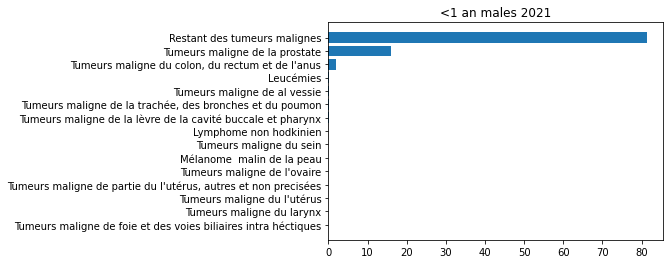

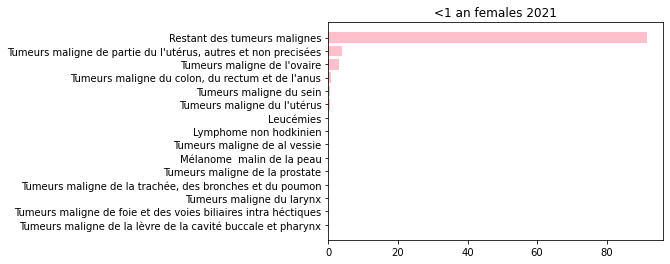

                                                    x      y
2   Tumeurs maligne de foie et des voies biliaires...   0.00
3                           Tumeurs maligne du larynx   0.00
5                         Tumeurs maligne du l'utérus   0.00
6   Tumeurs maligne de partie du l'utérus, autres ...   0.00
7                         Tumeurs maligne de l'ovaire   0.00
9                          Mélanome  malin de la peau   0.00
10                            Tumeurs maligne du sein   0.00
12                             Lymphome non hodkinien   0.00
0   Tumeurs maligne de la lèvre de la cavité bucca...   0.17
4   Tumeurs maligne de la trachée, des bronches et...   0.17
11                       Tumeurs maligne de al vessie   0.17
13                                          Leucémies   0.17
1    Tumeurs maligne du colon, du rectum et de l'anus   1.89
8                      Tumeurs maligne de la prostate  15.95
14                       Restant des tumeurs malignes  81.48
                        

In [51]:
u=0
v=0
u0=0
u1=0
u10=0
Lx=[]
Lx1=[]
L=["Tumeurs maligne de la lèvre de la cavité buccale et pharynx",
"Tumeurs maligne du colon, du rectum et de l'anus",
"Tumeurs maligne de foie et des voies biliaires intra héctiques",
"Tumeurs maligne du larynx",
"Tumeurs maligne de la trachée, des bronches et du poumon",
"Tumeurs maligne du l'utérus",
"Tumeurs maligne de partie du l'utérus, autres et non precisées",
"Tumeurs maligne de l'ovaire",
"Tumeurs maligne de la prostate",
"Mélanome  malin de la peau",
"Tumeurs maligne du sein",
"Tumeurs maligne de al vessie",
"Lymphome non hodkinien",
"Leucémies",
"Restant des tumeurs malignes"]
y="Male"
for i in L:
    u=u+APV("75-79",y,i)
for x in L:
    u0=round(APV("75-79",y,x)/u*100,2)
    Lx.append(u0)
dfl=pd.DataFrame(list(zip(L,Lx)),columns=["x","y"])
dfl.sort_values("y",inplace=True)
plt.barh(dfl.x,dfl.y)
plt.title("<1 an males 2021")
plt.show()
z="Female"
for i in L:
    u1=u1+APV("75-79",z,i)
for x in L:
    u10=round(APV("75-79",z,x)/u1*100,2)
    Lx1.append(u10)
dfll=pd.DataFrame(list(zip(L,Lx1)),columns=["x","y"])
dfll.sort_values("y",inplace=True)
plt.barh(dfll.x,dfll.y,color="pink")
plt.title("<1 an females 2021")
plt.show()
print(dfl)
print(dfll)


In [55]:
#L=["Tumeurs maligne du colon, du rectum et de l'anus","Tumeurs maligne de foie et des voies biliaires intra héctiques","Tumeurs maligne du larynx","Tumeurs maligne de la trachée, des bronches et du poumon","Mélanome  malin de la peau","Tumeurs maligne du sein","Tumeurs maligne du l'utérus","Tumeurs maligne de partie du l'utérus, autres et non precisées","Tumeurs maligne de l'ovaire","Tumeurs maligne de la prostate","Tumeurs maligne de al vessie","Lymphome non hodkinien","Leucémies","Restant des tumeurs malignes"]
result=df21.loc[df21["CC"]=="Certaines affections dont l'origine se situe dans la période périnatale"]
result1=result.loc[result["classe_age"]=="5-9"]
result1

,AGENT_DE_SAISIE,TYPE_DE_CERTIFICAT,GOUVERNORAU,classe_age,SEXE,CAUSE_SOUS_JACENTE,CAUSE_A,CAUSE_B,CAUSE_C,CAUSE_D,...,DateOfBirth,DateOfDeath,Age_years,Age_Days,filter_$,CC,Newage,Nr,CC1,index
DECES_ID,,,,,,,,,,,,,,,,,,,,,
1108584.0,Donia,Certificat complete,Tunis,5-9,Masculin,P072,P072,P071,9999,NaN,...,2014-06-20,2021-06-30,7.0,2567.0,Selected,Certaines affections dont l'origine se situe d...,Undefined,NE,Reste du chapitre,1108584.0


In [ ]:
["Diarrhée et gastro_entérite d'origine présumée infectieuse","Tuberculose de l'appareil respiratoire","Autre formes de tuberculose","Choléra","Tuberculose"
 ,"Autres maladies intestinales infectieuses","Peste","Tétanos"
 ,"Diphtérie","Coqueluche","Infection à méningocoques"
 ,"Septicémie","Poliomyélite aigué","Rougeole","Autres maladies à virus","Paludisme"
 ,"Reste du chapitre de certaines maladieinfectieuses et parasitaires","Leucémies","Restant des tumeurs malignes","Reste du chapitre des tumeurs"
 ,"Anémies","Reste du chapitre des maladies du sang et des organes hématopoétiques et certains troubles dy système immunitaire"
 ,"Malnutrition et autre carences nutritionnelles","Reste du chapitre des maladies endocriniennes, nutritionnelles et métaboliques"
 ,"Méningites","Reste du chapitre des maladies du système nerveux","Maladies de l'oreille et de l'apophysemastoide",
 "Maladies de l'appareil circulatoire","Pneumopathies","Autres affections aigues des voies respiratoires",
 "Reste du chapitre des maladies de l'appareil respiratoire","Maladies de l'appareil digestif",
"Maladies de l'appareil génito-urinaire",
"Foetus et nouveau-né affectés par des troubles maternels et par des complications de la grossesse du travail et de laccouvchement",
 "Anomalies liées à la durée de la gestation et à la croissance du foetus","Traumatismes obstétricaux",
 "PHypoxie intra uterine et asphyxie obstericale","Détresse respiratoire du nouveau né","Pneumpathie cogénitale",
 "Autres troubles respiratoires du nouveau-né","Infection bactérienne du nouveau-né",
 "Omphalite du nouveau-né avec ou sans hémorragie légère","Affections hémorragiques et hématologiques du foetus et du nouveau_né",
 "Reste du chapitre des affections dont l'origine se situe dans la période périnatale",
 "Hydrocéphalie congénitale et spina bifida","Autres malformations congénitales du système nerveux",
 "Malfromations congénitales du coeur","Syndrome de Down et autres anomalies chromosomiques",
 "Autres malformations congénitales de l'appareil circulatoire","Autres malformations congénitales",
 "Symptomes, signes et résultats anormaux d'examens cliniques et de laboratoire, non classés ailleurs",
 "Cause externes de morbidité et de mortalité","Accident de transport","Noyade et submersion accidentelles",
 "Autre accodents affectant la respiration","Exposition a la fumée, au feu et aux flammes","Intoxication accidentelle",
 "Agressions","Toutes autres causes externes","SRAS",
 "COVID-19","Infection dont le mode de transmission est essentiellement sexuel","Rage",
 "Fièvre jaune","Fièvre virales trasmises par des arthropodes","Hépatite virale",
"Leishmaniose","Trypanosomiase","Tumeurs maligne de la lèvre de la cavité buccale et pharynx",
 "Tumeurs maligne de l'oesophage","Tumeurs maligne de l'estomac","Tumeurs maligne du colon, du rectum et de l'anus",
 "Tumeurs maligne de foie et des voies biliaires intra héctiques","Tumeurs maligne du pancréas","Tumeurs maligne du larynx",
 "Tumeurs maligne de la trachée, des bronches et du poumon","Mélanome  malin de la peau","Tumeurs maligne du sein",
 "Tumeurs maligne du l'utérus","Tumeurs maligne de partie du l'utérus, autres et non precisées","Tumeurs maligne de l'ovaire",
 "Tumeurs maligne de la prostate","Tumeurs maligne de al vessie",
 "Tumeur maligne des méninges, du cerveau et d'autre parties du système nerveux central","Lymphome non hodkinien",
 "Myélome multiple et tumeurs malignes à plasmocytes","Leucémies","Restant des tumeurs malignes","Malnutrition",
 "Diabète sucré","Reste du chapitre des maladies endocriniennes, nutritionnelles et métaboliques",
 "Trouble mentaux liés a l'utilisation de substances psychoactives","Reste du chapitre des troubles mentaux et du comportement"
 ,"Alzheimer","Maladies de l'oreille et de ses annexes","Rhumatisme","Maladies hypertensives","Cardiopathies ischémiques","Autres cardiopathies"
 ,"Maladies cérébrovasculaires","Athéroslerose","Reste du chapitre des maladies de l'appareil circulatoire",
 "Grippe","Autres affections aigués des voies respiratoires inférieurs","Maladies chroniques des voies respiratoires inférieures",
 "Ulcère de l'estomac et du duodénum","Maladies du foie","Maladies de la peau et du tissu cellulaire sous-cutané",
 "Maladies du systéme ostéo-articulaire, des muscles et du tissu conjonctif","Glomérulopathies et maladies rénales tubulo-interstitielles",
 "Reste du chapitre des maladies de l'appareil génito-urinaire","Grossesse se terminant par un avortement","Autres décès maternels directs","Décès maternels indirects",
 "Reste du chapitre de grossesse, accouchement et puerpéralité","Certaines affections dont l'origine se situe dans la période périnatale"
 ,"Malformations congénitales et anomalies chromosomiques","Chute"]
